In [1]:
! pip install tab2img

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('iot23_combined.csv', index_col=0)
df

C:\ProgramData\Anaconda3\envs\geemap\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\envs\geemap\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_-,...,conn_state_S060,conn_state_S0S0,conn_state_S0alicious PartOfAHorizontalPortScan,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,conn_state_licious PartOfAHorizontalPortScan
0,2.998796,0,0,0,3,180,0,0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,60,0,0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,60,0,0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,0,0,0,0
3,2.998804,0,0,0,3,180,0,0,Benign,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,60,0,0,Benign,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.0,0,0,0,1,40,0,0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,0,0,0,0
99995,0.0,0,0,0,1,40,0,0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,0,0,0,0
99996,0.0,0,0,0,1,40,0,0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,0,0,0,0
99997,0.0,0,0,0,1,40,0,0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.label.value_counts()

PartOfAHorizontalPortScan                                      825624
Okiru                                                          262690
Benign                                                         197760
DDoS                                                           138690
C&C                                                             15101
                                                                ...  
-   Malicious   PartOfAHorizontalPorrtOfAHorizontalPortScan         1
-   Malicious   PartOf PartOfAHorizontalPortScan                    1
-   Maliciolicious   PartOfAHorizontalPortScan                      1
-   Malicious   PartO   PartOfAHorizontalPortScan                   1
-   M  Malicious   DDoS                                             1
Name: label, Length: 106, dtype: int64

In [5]:
for label in df.label.unique(): 
    if 'PartOfAHorizontalPortScan' in label:
        df.loc[(df.label == label), 'label'] = 'PartOfAHorizontalPortScan'

In [6]:
for label in df.label.unique(): 
    if 'Benign' in label:
#         print(label)
        df.loc[(df.label == label), 'label'] = 'Benign'

In [7]:
for label in df.label.unique(): 
    if 'DDoS' in label:
#         print(label)
        df.loc[(df.label == label), 'label'] = 'DDoS'

In [8]:
for label in df.label.unique(): 
    if 'Part' in label:
#         print(label)
        df.loc[(df.label == label), 'label'] = 'PartOfAHorizontalPortScan'

In [9]:
for label in df.label.unique(): 
    if 'Scan' in label:
#         print(label)
        df.loc[(df.label == label), 'label'] = 'PartOfAHorizontalPortScan'

In [10]:
for label in df.label.unique(): 
    if 'Ma' in label:
        df.loc[(df.label == label), 'label'] = 'PartOfAHorizontalPortScan'

In [11]:
df.label.value_counts()

PartOfAHorizontalPortScan     825709
Okiru                         262690
Benign                        197763
DDoS                          138693
C&C                            15101
Attack                          3915
-1                               375
C&C-HeartBeat                    324
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          2
(em-                               1
-   Mcan                           1
-  n                               1
Name: label, dtype: int64

In [12]:
df.loc[(df.label == '(em-'), 'label'] = 'PartOfAHorizontalPortScan'
df.loc[(df.label == '-   Mcan'), 'label'] = 'PartOfAHorizontalPortScan'
df.loc[(df.label == '-  n'), 'label'] = 'PartOfAHorizontalPortScan'

In [13]:
df.label.value_counts()

PartOfAHorizontalPortScan     825712
Okiru                         262690
Benign                        197763
DDoS                          138693
C&C                            15101
Attack                          3915
-1                               375
C&C-HeartBeat                    324
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          2
Name: label, dtype: int64

In [14]:
df.loc[(df.label == 'C&C-HeartBeat'), 'label'] = 'C&C'
df.loc[(df.label == 'C&C-FileDownload'), 'label'] = 'C&C'
df.loc[(df.label == 'C&C-Torii'), 'label'] = 'C&C'
df.loc[(df.label == 'C&C-HeartBeat-FileDownload'), 'label'] = 'C&C'
df.loc[(df.label == 'C&C-Mirai'), 'label'] = 'C&C'

In [15]:
df.label.value_counts()

PartOfAHorizontalPortScan    825712
Okiru                        262690
Benign                       197763
DDoS                         138693
C&C                           15508
Attack                         3915
-1                              375
FileDownload                     13
Name: label, dtype: int64

In [16]:
df.loc[(df.label == '-1'), 'label'] = 'Attack'
df.loc[(df.label == 'FileDownload'), 'label'] = 'Attack'

In [17]:
df.label.value_counts()

PartOfAHorizontalPortScan    825712
Okiru                        262690
Benign                       197763
DDoS                         138693
C&C                           15508
Attack                         4303
Name: label, dtype: int64

In [18]:
CATEGORICAL_COLUMNS = ['label']

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[CATEGORICAL_COLUMNS])
OrdinalEncoder()
enc.categories_
df[CATEGORICAL_COLUMNS] = enc.transform(df[CATEGORICAL_COLUMNS])
# df = df.reset_index()
# df=df.drop(['index'],axis=1)
df["label"] = df["label"].astype(int)
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_-,...,conn_state_S060,conn_state_S0S0,conn_state_S0alicious PartOfAHorizontalPortScan,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,conn_state_licious PartOfAHorizontalPortScan
0,2.998796,0,0,0,3,180,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,60,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,60,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
3,2.998804,0,0,0,3,180,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,60,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.0,0,0,0,1,40,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
99995,0.0,0,0,0,1,40,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
99996,0.0,0,0,0,1,40,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
99997,0.0,0,0,0,1,40,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444669 entries, 0 to 99998
Data columns (total 79 columns):
 #   Column                                                      Non-Null Count    Dtype 
---  ------                                                      --------------    ----- 
 0   duration                                                    1444669 non-null  object
 1   orig_bytes                                                  1444669 non-null  object
 2   resp_bytes                                                  1444669 non-null  object
 3   missed_bytes                                                1444669 non-null  object
 4   orig_pkts                                                   1444669 non-null  object
 5   orig_ip_bytes                                               1444669 non-null  object
 6   resp_pkts                                                   1444669 non-null  object
 7   resp_ip_bytes                                               1444669 non-nu

In [20]:
df = df.drop(columns=['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 
                      'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444669 entries, 0 to 99998
Data columns (total 71 columns):
 #   Column                                                      Non-Null Count    Dtype
---  ------                                                      --------------    -----
 0   label                                                       1444669 non-null  int32
 1   proto_-                                                     1444669 non-null  int64
 2   proto_0                                                     1444669 non-null  int64
 3   proto_0.000002                                              1444669 non-null  int64
 4   proto_0.000006                                              1444669 non-null  int64
 5   proto_0.000492                                              1444669 non-null  int64
 6   proto_0.002745                                              1444669 non-null  int64
 7   proto_0.029483                                              1444669 non-null  int64

In [22]:
X = df.drop(columns=['label']).values

In [23]:
y = df.label.values

In [24]:
from tab2img.converter import Tab2Img

model = Tab2Img()
images = model.fit_transform(X, y)

In [25]:
type(images)

numpy.ndarray

In [26]:
images.shape

(1444669, 9, 9)

In [27]:
y.shape

(1444669,)

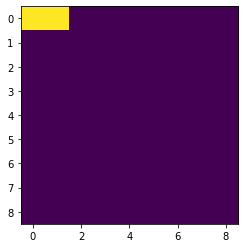

In [28]:
import matplotlib.pyplot as plt

plt.imshow(images[0])

In [29]:
y[0]

5

In [31]:
df.label.unique()

array([5, 1, 0, 4, 3, 2])

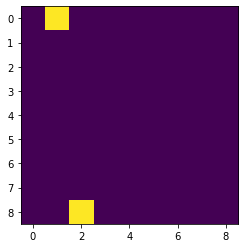

In [32]:
import matplotlib.pyplot as plt

plt.imshow(images[100])

In [33]:
y[100]

1